<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_003_study_essential/_000_mnist/_006_mnist_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [1]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras import layers, models, utils
import matplotlib.pyplot as plt

In [2]:
# tag::load data[]
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# end::load data[]

11493376/11490434 [==============================] - 0s 0us/step


## shape 확인

In [3]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

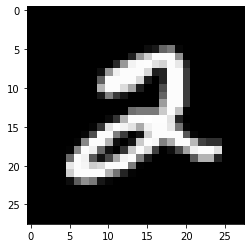

In [5]:
plt.imshow(x_train[5], cmap='gray')

## 정답 확인

In [6]:
y_train[5]

2

# 수치 낮추기

In [7]:
x_train, x_test = x_train / 255.0 , x_test / 255.0

# build model by functional

In [8]:
input = layers.Input(shape=(28, 28))
H = layers.Flatten()(input)  #  평평하게 만들기
H = layers.Dense(units=256, activation='relu')(H)
H = layers.Dropout(rate=0.5)(H)
H = layers.Dense(128, activation='relu')(H)
H = layers.Dense(32, activation='relu')(H)
output = layers.Dense(10, activation='softmax')(H)  # 숫자가 0-9  == 10개

model = models.Model(input, output)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330   

# compile model

In [10]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# train model

In [11]:
history = model.fit(x_train, 
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 5s 3ms/step - loss: 0.6077 - accuracy: 0.8108 - val_loss: 0.1273 - val_accuracy: 0.9601
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1870 - accuracy: 0.9433 - val_loss: 0.0988 - val_accuracy: 0.9683
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1456 - accuracy: 0.9551 - val_loss: 0.0884 - val_accuracy: 0.9738
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1271 - accuracy: 0.9594 - val_loss: 0.0828 - val_accuracy: 0.9737
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1093 - accuracy: 0.9654 - val_loss: 0.0901 - val_accuracy: 0.9711
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0981 - accuracy: 0.9691 - val_loss: 0.0685 - val_accuracy: 0.9782
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0964 - accuracy: 0.9715 - val_loss: 0.0735 - val_accuracy: 0.9774
Epoch 

Text(0, 0.5, 'accuracy')

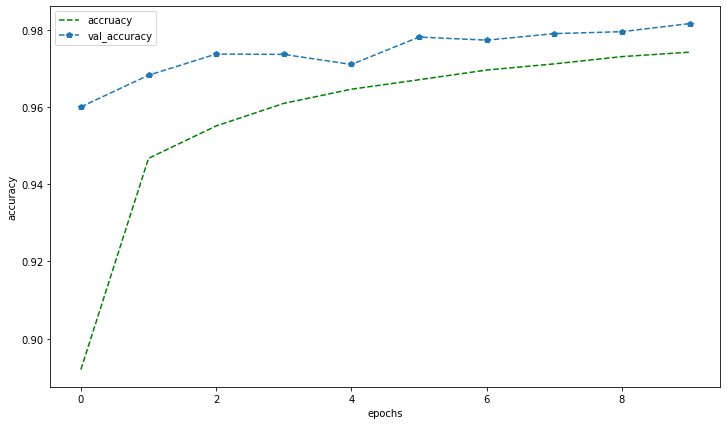

In [12]:
plt.subplots(figsize=(12, 7))
plt.plot(history.history['accuracy'], 'g--')
plt.plot(history.history['val_accuracy'], 'p--')

legend = ['accruacy', 'val_accuracy']

plt.legend(legend)
plt.xlabel('epochs')
plt.ylabel('accuracy')

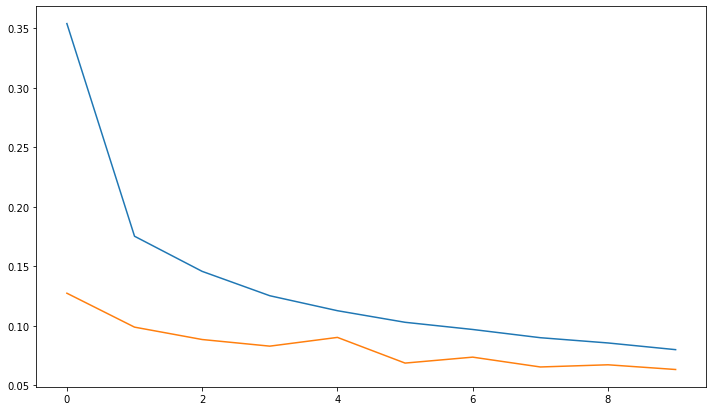

In [13]:
plt.subplots(figsize=(12, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Chap.2

# Convnet - Convolutaion Neural network

In [14]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
y_train.shape

(60000,)

In [16]:
unique_list = np.unique(y_test)  # y_test 안에 존재하는 유일값 생성
num_classes = len(unique_list)  # 유일한 값의 개수 (길이)
num_classes

10

## to one hot encoding

In [17]:
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [18]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

## 차원 증가 (이미지 학습을 위한)

In [19]:
# tag::load data[]
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255. , x_test / 255.

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)
# end::load data[]

In [20]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [21]:
x_train.shape[1:]

(28, 28, 1)

In [22]:
data_shape = x_train.shape[1:]

## build model - Conv2D

In [23]:
input = layers.Input( data_shape )
H = layers.Conv2D(filters=32, kernel_size=(3, 3))(input)
H = layers.Activation('relu')(H)
H = layers.MaxPooling2D(pool_size=(2, 2))(H)

H = layers.Conv2D(64, kernel_size=(3, 3))(H)
H = layers.Activation('relu')(H)
H = layers.MaxPooling2D(pool_size=(2, 2), 
                        strides=(3, 3))(H)

H = layers.Flatten()(H)

H = layers.Dropout(.3)(H)
H = layers.Dense(units=10)(H)

output = layers.Activation('softmax')(H)

model = models.Model(input, output)

## compile model

In [24]:
model.compile(optimizer=optimizers.Adam(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'mse'])

## train model

In [25]:
history = model.fit(x_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 9s 4ms/step - loss: 0.5931 - accuracy: 0.8178 - mse: 0.0258 - val_loss: 0.0757 - val_accuracy: 0.9760 - val_mse: 0.0036
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0983 - accuracy: 0.9686 - mse: 0.0047 - val_loss: 0.0504 - val_accuracy: 0.9830 - val_mse: 0.0025
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0725 - accuracy: 0.9770 - mse: 0.0035 - val_loss: 0.0430 - val_accuracy: 0.9849 - val_mse: 0.0022
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0566 - accuracy: 0.9827 - mse: 0.0027 - val_loss: 0.0401 - val_accuracy: 0.9855 - val_mse: 0.0021
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0521 - accuracy: 0.9842 - mse: 0.0025 - val_loss: 0.0356 - val_accuracy: 0.9884 - val_mse: 0.0018
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0431 - accuracy: 0.9856 - mse: 0.0021 - val_loss: 0.03

Text(0, 0.5, 'accuracy')

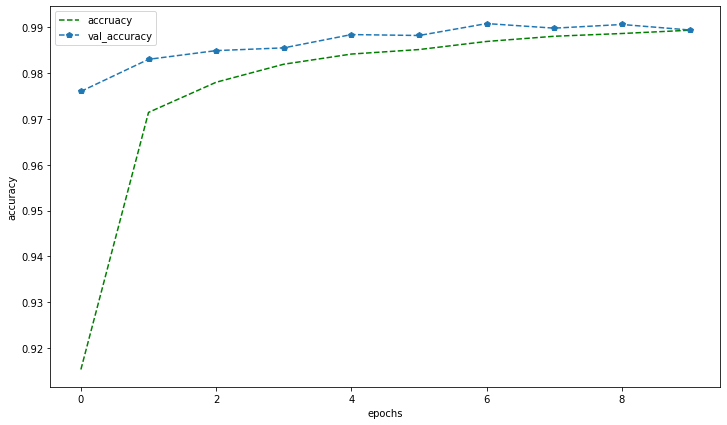

In [26]:
plt.subplots(figsize=(12, 7))
plt.plot(history.history['accuracy'], 'g--')
plt.plot(history.history['val_accuracy'], 'p--')

legend = ['accruacy', 'val_accuracy']

plt.legend(legend)
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [32]:
print(x_train[5].reshape(-1).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 25, 100, 122, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 33, 151, 208, 252, 252, 252, 146, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 40, 152, 244, 252, 253, 224, 211, 252, 232, 40, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 152, 239, 252, 252, 252, 216, 31, 37, 252, 252, 60, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 96, 252, 252, 252, 252, 217, 29, 0, 37, 252, 252, 60, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 181, 252, 252, 220, 167, 30, 0, 0, 77, 252, 252, 60, 0, 0